In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

In [5]:
df = pd.read_csv("D:/Telco_customer_churn.csv")
df.drop(columns=["customerID"], inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [7]:
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [9]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model_no_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_no_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=10, batch_size=32,
                                          validation_split=0.2, verbose=0)
history_dropout = model_dropout.fit(X_train, y_train, epochs=10, batch_size=32,
                                    validation_split=0.2, verbose=0)

In [17]:
loss_nd, acc_nd = model_no_dropout.evaluate(X_test, y_test, verbose=0)
loss_d, acc_d = model_dropout.evaluate(X_test, y_test, verbose=0)

In [33]:
epochs = range(1, 11)
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

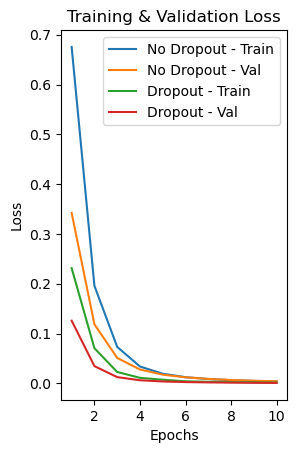

In [35]:
plt.subplot(1, 2, 1)
plt.plot(epochs, history_no_dropout.history['loss'], label='No Dropout - Train')
plt.plot(epochs, history_no_dropout.history['val_loss'], label='No Dropout - Val')
plt.plot(epochs, history_dropout.history['loss'], label='Dropout - Train')
plt.plot(epochs, history_dropout.history['val_loss'], label='Dropout - Val')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

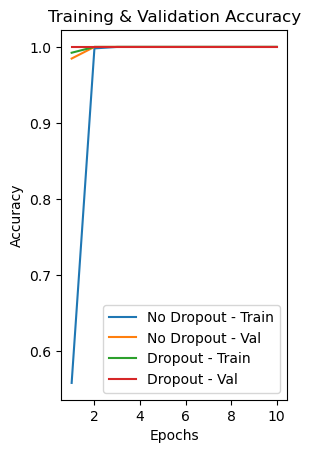

In [37]:
plt.subplot(1, 2, 2)
plt.plot(epochs, history_no_dropout.history['accuracy'], label='No Dropout - Train')
plt.plot(epochs, history_no_dropout.history['val_accuracy'], label='No Dropout - Val')
plt.plot(epochs, history_dropout.history['accuracy'], label='Dropout - Train')
plt.plot(epochs, history_dropout.history['val_accuracy'], label='Dropout - Val')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [39]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [41]:
print("\n🔹 Final Evaluation:")
print("{:<15} {:<15} {:<15}".format("Model", "Test Accuracy", "Test Loss"))
print("{:<15} {:<15.4f} {:<15.4f}".format("No Dropout", acc_nd, loss_nd))
print("{:<15} {:<15.4f} {:<15.4f}".format("With Dropout", acc_d, loss_d))


🔹 Final Evaluation:
Model           Test Accuracy   Test Loss      
No Dropout      1.0000          0.0037         
With Dropout    1.0000          0.0007         
